# NUS ISS - Team Palantir - KE5108 Machine Vision - CA 3
This py code is to perform automatic blood vessel segmentation on retinal fundus image

1. Data exploration
2. Data preprocessing
3. Feature Extraction
4. Machine Learning
5. Post Processing (if needed)
6. Performance Evaluation

## 1. Data Exploration

In [16]:
%matplotlib inline

import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import matlab.engine
eng = matlab.engine.start_matlab()

imgBgr = cv.imread('20_test.tif')
imgRgb = cv.cvtColor(imgBgr, cv.COLOR_BGR2RGB)

plt.title('Original (RGB)')
plt.imshow(imgRgb)
plt.xticks([])
plt.yticks([])
plt.show()
print('Image shape:', imgRgb.shape[:2])

def imreadGIF(path):
    return np.array(Image.open(path))

Image shape: (584, 565)


In [17]:
channels = cv.split(imgBgr)
colors = ('b','g','r')

mask = imreadGIF('20_test_mask.gif')
plt.title('RGB Histogram (masked)')
plt.xlabel('Bins')
plt.ylabel('f')
for (channel, color) in zip(channels, colors): 
    hist = cv.calcHist([channel], [0], mask, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

In [18]:
imgGray = cv.cvtColor(imgBgr, cv.COLOR_BGR2GRAY)
plt.title('Grayscale')
plt.imshow(imgGray,'gray')
plt.show()

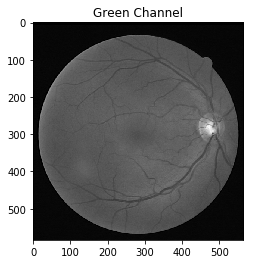

In [19]:
 #take the green channel
imgGreenCh = imgBgr[:,:,1]
plt.title('Green Channel')
plt.imshow(imgBgr[:,:,1], 'gray')
plt.show()

In [20]:
#imgGray = cv.cvtColor(imgBgr, cv.COLOR_BGR2GRAY)
#eqHist = cv.equalizeHist(imgGray)
#plt.title('EqHist from Grayscale')
#plt.imshow(np.hstack([eqHist]),'gray')
#plt.show()

In [21]:
#eqHist = cv.equalizeHist(imgGreenCh)
#plt.title('EqHist from Green Channel')
#plt.imshow(np.hstack([eqHist]),'gray')
#plt.show()




## 2. Data Preprocessing

port baseline from matlab

In [22]:
mat1 = sio.loadmat('train_NN_prepro2_purelin.mat')
mat2 = sio.loadmat('test_NN_prepro2_purelin.mat')

trainX = mat1['FEATS'].T
trainY = mat1['TARGET'].T

testX = mat2['TEST_NN'].T
testY = mat2['GT_data1'].T

In [23]:
trainX.shape

(27503, 7)

In [24]:
trainY.shape

(27503, 1)

In [25]:
trainY.shape

(27503, 1)

In [26]:
testY.shape

(20, 1)

In [27]:
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'GT_data1', 'GT_data2', 'IMAGE_data', 'MASK_data', 'TEST_NN', 'net'])




## 3. Feature Extraction

In [28]:
ret = eng.triarea(1.0,5.0)
print(ret)

type(ret)

997.0


float